#### Problem Definition

PowerHorse, a tractor and farm equipment manufacturing company, was established a few years after World War II. The company has shown a consistent growth in its revenue from tractor sales since its inception. However, over the years the company has struggled to keep it’s inventory and production cost down because of variability in sales and tractor demand. The management at PowerHorse is under enormous pressure from the shareholders and board to reduce the production cost.

We will develop an ARIMA model to forecast sale / demand of tractor for next 3 years.

The company shared the month on month (MoM) sales figures (number of tractors sold) for the last 12 years in the tractor-sales.csv file.

In [2]:
# Importing Libraries for data manipulation, plotting and stats modeling.

import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [3]:
# Reading the available data.

sales_data = pd.read_csv("E:/asubudhi/class/Class_8/0. Tractor Sales forecasting - Class Exercise/Tractor-Sales.csv")
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Data Manipulation to make a file that can go as a model input.
# Since the complete date was not mentioned, we assume that it was the first of every month.

dates = pd.date_range(start = '2003-01-01', freq = 'MS', periods = len(sales_data))

In [6]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [7]:
import calendar
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
Month                     144 non-null object
Year                      144 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.6+ KB


In [9]:
sales_data.drop(['Month-Year'], axis = 1, inplace = True)
sales_data.rename(columns = {'Number of Tractor Sold':'Tractor_sales'}, inplace = True)
sales_data = sales_data[['Month','Year','Tractor_sales']]

In [10]:
sales_data.head()

,Month,Year,Tractor_sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [11]:
# Set the 'dates' as the index of the dataframe, so that it can be treated as a time-series dataframe

sales_data.set_index(dates, inplace = True)

In [12]:
sales_data.head()

,Month,Year,Tractor_sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [13]:
# Extracting the time- series

sales_ts = sales_data['Tractor_sales']
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor_sales, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


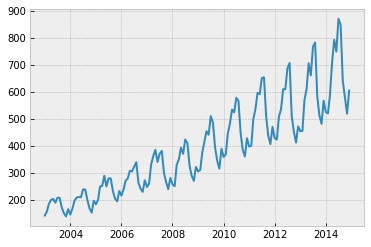

In [14]:
# Visualize the time-series

plt.plot(sales_ts)

Text(0.5, 1.0, 'tractor sales for last 12 years')

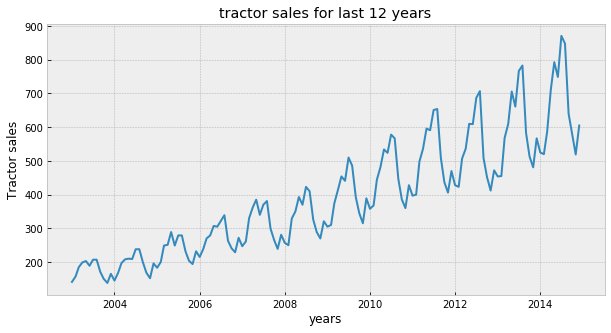

In [15]:
plt.figure(figsize = (10,5))
plt.plot(sales_ts)
plt.xlabel('years')
plt.ylabel('Tractor sales')
plt.title('tractor sales for last 12 years')

Now, let’s try to remove wrinkles from our time series using moving average. We will take moving average of different time periods i.e. 4,6,8, and 12 months as shown below. Here, moving average is shown in red and actual series in blue.

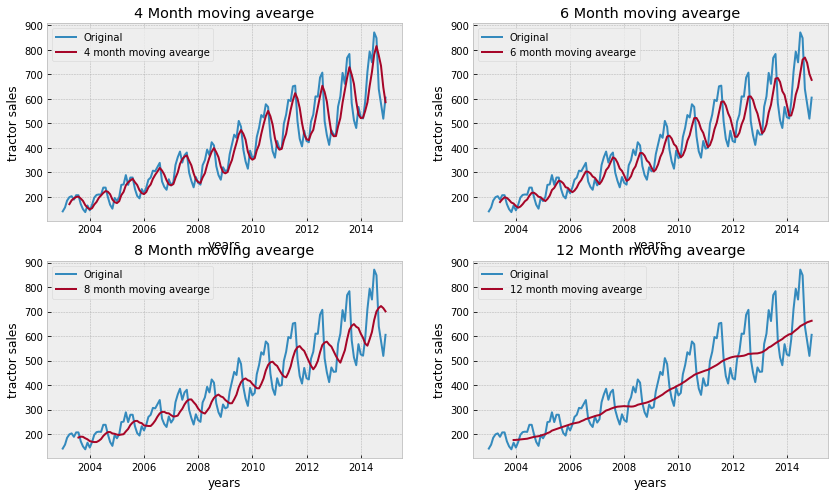

In [16]:
fig, axes = plt.subplots(2,2, sharey = False, sharex = False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index, sales_ts, label = 'Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window = 4).mean(), label = '4 month moving avearge')
axes[0][0].set_xlabel('years')
axes[0][0].set_ylabel('tractor sales')
axes[0][0].set_title('4 Month moving avearge')
axes[0][0].legend(loc = 'upper left')

axes[0][1].plot(sales_ts.index, sales_ts, label = 'Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window = 6).mean(), label = '6 month moving avearge')
axes[0][1].set_xlabel('years')
axes[0][1].set_ylabel('tractor sales')
axes[0][1].set_title('6 Month moving avearge')
axes[0][1].legend(loc = 'upper left')

axes[1][0].plot(sales_ts.index, sales_ts, label = 'Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window = 8).mean(), label = '8 month moving avearge')
axes[1][0].set_xlabel('years')
axes[1][0].set_ylabel('tractor sales')
axes[1][0].set_title('8 Month moving avearge')
axes[1][0].legend(loc = 'upper left')

axes[1][1].plot(sales_ts.index, sales_ts, label = 'Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window = 12).mean(), label = '12 month moving avearge')
axes[1][1].set_xlabel('years')
axes[1][1].set_ylabel('tractor sales')
axes[1][1].set_title('12 Month moving avearge')
axes[1][1].legend(loc = 'upper left')

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences.

As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

##### Checking Seasonality of the data

The first thing to do is to see how number of tractors sold vary on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [17]:
# Seeing the monthly pattern

monthly_sales_data = pd.pivot_table(sales_data, values = 'Tractor_sales',columns = 'Year', index = 'Month')

In [18]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

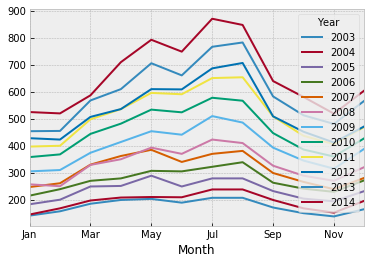

In [19]:
monthly_sales_data.plot()

In [20]:
# Looking for yearly-pattern of the data

yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor_sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


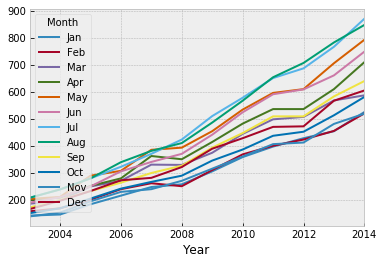

In [21]:
yearly_sales_data.plot()

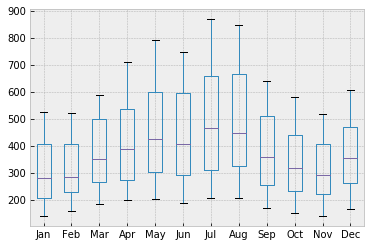

In [22]:
yearly_sales_data.boxplot()

##### Important Inferences
The tractor sales have been increasing without fail every year.

July and August are the peak months for tractor sales and the variance and the mean value in July and August are also much higher than any of the other months.

##### Time Series Decomposition
To decipher underlying patterns in tractor sales, we build a multiplicative time series decomposition model with the following equation:

we are also aware that decomposition models like these are rarely used for forecasting. Their primary purpose is to understand underlying patterns in temporal data to use in more sophisticated analysis like Holt-Winters seasonal method or ARIMA.

In [23]:
# Creating a multiplicative model

decompose = smt.seasonal_decompose(sales_ts, model='multiplicative',two_sided= False, extrapolate_trend=4)

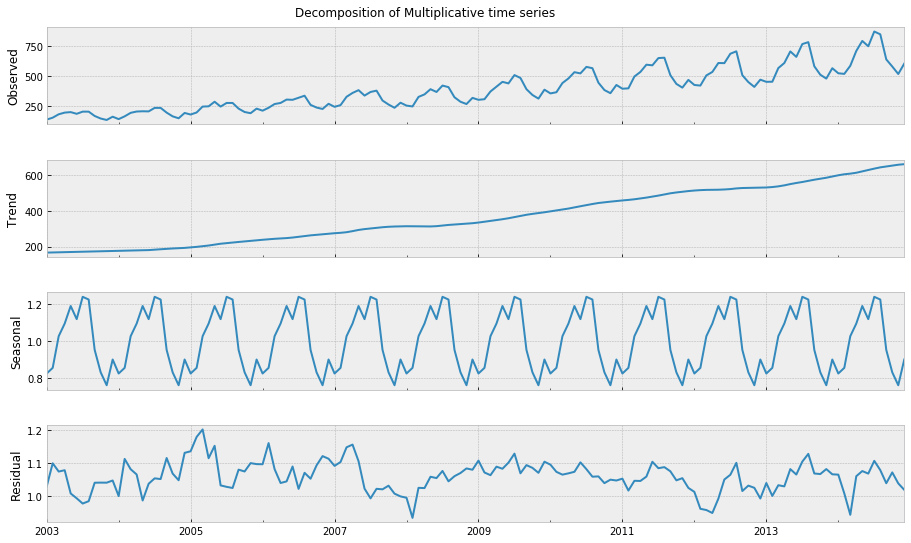

In [24]:
fig = decompose.plot()
fig.set_figwidth(14)
fig.set_figheight(8)
fig.suptitle('Decomposition of Multiplicative time series')
plt.show()

In [25]:
decomp_output = pd.DataFrame(pd.concat([decompose.observed,decompose.trend,decompose.seasonal,decompose.resid], axis = 1)) 

In [26]:
decomp_output.columns = ['Observed','Trend','Seasonal','Residual']

In [27]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Residual

In [28]:
decomp_output.head()

,Observed,Trend,Seasonal,Residual,TSI
2003-01-01,141,166.408333,0.823508,1.028907,141.0
2003-02-01,157,167.216667,0.853891,1.099557,157.0
2003-03-01,185,168.025000,1.024830,1.074350,185.0
2003-04-01,199,168.833333,1.092962,1.078424,199.0
2003-05-01,203,169.641667,1.187805,1.007438,203.0


### Dickey Fuller test

Dickey-Fuller Test:
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [29]:
# Perform Dickey Fuller Test:

dftest = smt.stattools.adfuller(sales_ts)
dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

In [30]:
print("Result of the Dickey Fuller Test are:")
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Result of the Dickey Fuller Test are:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical value (1%)             -3.482088
Critical value (5%)             -2.884219
Critical value (10%)            -2.578864
dtype: float64


- We will perform the adfuller test again and again, untill the test statistic value is less than the critical value.

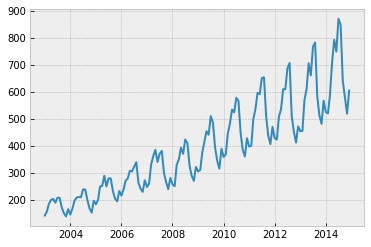

In [31]:
# we can see neither the variance is consisitent over the mean nor the mean is constant over time.

plt.plot(sales_ts)

In [32]:
# one of the bet way to make variance constant around mean is to take log of the series.

sales_ts_log = np.log10(sales_ts)

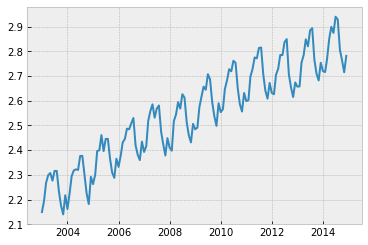

In [33]:
plt.plot(sales_ts_log)

- we see that the variance have become constant around mean but the mean is still not constant over time, thus the series is not stationary as seen in below adfuller test.
- one of the technique to make mean constant over time is to remove trend from the series and that can be achieved by a technique called differencing.

In [34]:
dftest = smt.stattools.adfuller(sales_ts_log)
dfoutput = pd.Series(dftest[0:4], index = ['Test_Statistics','P-value','#lag-used','No of observation used'])
print("Result of Dickey Fuller test are:")
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Result of Dickey Fuller test are:
Test_Statistics            -1.732472
P-value                     0.414464
#lag-used                  13.000000
No of observation used    130.000000
Critical value (1%)        -3.481682
Critical value (5%)        -2.884042
Critical value (10%)       -2.578770
dtype: float64


In [35]:
# Differencing of the original series and performing adfuller test.

sales_ts_diff1 = sales_ts.diff(1)
sales_ts_diff1.dropna(inplace = True)

In [36]:
dftest = smt.stattools.adfuller(sales_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index = ['Test_Statistics','P-value','#lag-used','No of observation used'])
print("Result of Dickey Fuller test are:")
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Result of Dickey Fuller test are:
Test_Statistics            -2.543481
P-value                     0.105250
#lag-used                  14.000000
No of observation used    128.000000
Critical value (1%)        -3.482501
Critical value (5%)        -2.884398
Critical value (10%)       -2.578960
dtype: float64


In [37]:
# Take the differencing of the log series and performimg adfuller test.

sales_ts_log_diff1 = sales_ts_log.diff(1)
sales_ts_log_diff1.dropna(inplace = True)

In [38]:
dftest = smt.stattools.adfuller(sales_ts_log_diff1)
dfoutput = pd.Series(dftest[0:4], index = ['Test_Statistics','P-value','#lag-used','No of observation used'])
print("Result of Dickey Fuller test are:")
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Result of Dickey Fuller test are:
Test_Statistics            -2.680467
P-value                     0.077480
#lag-used                  14.000000
No of observation used    128.000000
Critical value (1%)        -3.482501
Critical value (5%)        -2.884398
Critical value (10%)       -2.578960
dtype: float64


- we can see some improvement in the result but the ideal is not achived. lets try second order differencing. 

In [39]:
# Differencing the series and perform adfuller test again.

sales_ts_log_diff2 = sales_ts_log.diff(2)
sales_ts_log_diff2.dropna(inplace = True)

In [40]:
dftest = smt.stattools.adfuller(sales_ts_log_diff2)
dfoutput = pd.Series(dftest[0:4], index = ['Test_Statistics','P-value','#lag-used','No of observation used'])
print("Result of Dickey Fuller test are:")
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Result of Dickey Fuller test are:
Test_Statistics            -3.200722
P-value                     0.019943
#lag-used                  11.000000
No of observation used    130.000000
Critical value (1%)        -3.481682
Critical value (5%)        -2.884042
Critical value (10%)       -2.578770
dtype: float64


As the 'test statistics' is less than the critical values. Now we can say that log of series with second order differencing can make the original series stationary.

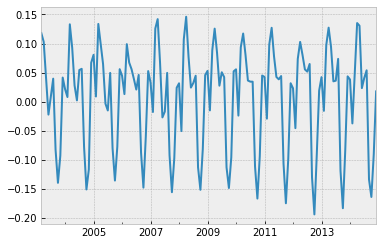

In [41]:
sales_ts_log_diff2.plot()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


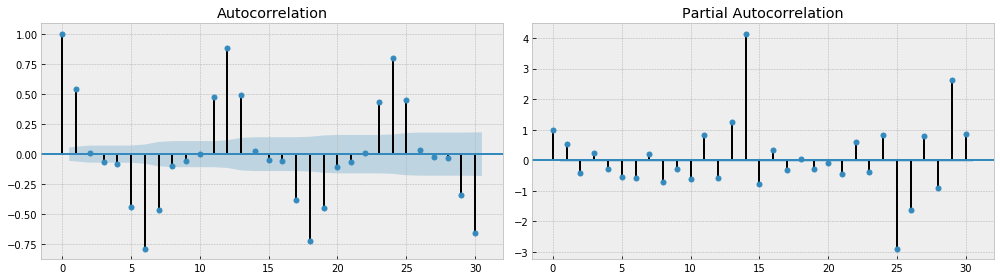

In [42]:
# Ploting ACF and PACF plot  

fig, axes = plt.subplots(1,2, sharex = False, sharey = False)
fig.set_figwidth(14)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff2, lags = 30, ax = axes[0], alpha = 0.5)
smt.graphics.plot_pacf(sales_ts_log_diff2, lags = 30, ax = axes[1], alpha = 0.5)
plt.tight_layout()

Since, there are enough spikes in the plots outside the insignificant zone. we can conclude that the residuals are not random. This implies that there is still information available in residuals to be extracted by AR and MA models. Also, there is a seasonal component available in the residuals at the lag 12 (represented by spikes at lag 12). This makes sense since we are analyzing monthly data that tends to have seasonality of 12 months because of patterns in tractor sales.

In [43]:
# Randomly running a SARIMAX model to see the output (optional we can go to next step directly)

model = smt.statespace.SARIMAX(sales_ts_log, order = (1,2,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [44]:
results = model.fit()

In [45]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor_sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 0, 12)   Log Likelihood                 329.109
Date:                            Mon, 03 Aug 2020   AIC                           -650.219
Time:                                    14:03:10   BIC                           -638.780
Sample:                                01-01-2003   HQIC                          -645.571
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3416      0.066     -5.161      0.000      -0.471      -0.212
ma.L1         -0.9999     16.479   

##### Identification of best fit ARIMA model

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. We will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.
This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

In [46]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [47]:
# Generate all different combinations of seasonal P, D and Q triplets
D = range(0,2)
P = Q = range(0, 2) 
S = range(12,13)
seasonal_pdq = list(itertools.product(P, D, Q ,S))

In [48]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [49]:
# Iterate the process to find the best model with p,d,q and P,D,Q value.

import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = smt.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{} model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 2, 1)x(1, 0, 1, 12) model - AIC:-673.2914472092332


##### Predict sales on in-sample data using the best fit ARIMA model

The next step is to predict tractor sales for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [50]:
best_model = smt.statespace.SARIMAX(sales_ts_log, order = (1,2,1), seasonal_order= (1,0,1,12), enforce_stationarity= False, enforce_invertibility= False)

In [51]:
best_results = best_model.fit()

In [52]:
print(best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor_sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 341.646
Date:                            Mon, 03 Aug 2020   AIC                           -673.291
Time:                                    14:05:08   BIC                           -659.031
Sample:                                01-01-2003   HQIC                          -667.497
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3543      0.073     -4.844      0.000      -0.498      -0.211
ma.L1         -1.0001      9.644   

In [53]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

In [54]:
pred_dynamic.predicted_mean

2014-01-01    2.723856
2014-02-01    2.723625
2014-03-01    2.809649
2014-04-01    2.812500
2014-05-01    2.889006
2014-06-01    2.885693
2014-07-01    2.933804
2014-08-01    2.942494
2014-09-01    2.808312
2014-10-01    2.747064
2014-11-01    2.725480
2014-12-01    2.790484
Freq: MS, dtype: float64

In [55]:
# Converting back the log transformed to get the result on original scale.

forecast = np.power(10, pred_dynamic.predicted_mean)

In [56]:
actual = sales_ts['2014-01-01':]

###### calculating the accuracy metrics for last one year

In [57]:
MAPE_last1year = (np.mean(np.abs(actual - forecast)/actual))*100

In [58]:
print('The Mean Absolute percentage error of our forecast for last one years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last one years is 3.2939


In [59]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 803.5048
The ROOT Mean Squared Error of our forecasts is 28.346160233795334


In [60]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [61]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), index = idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [62]:
fc_all = pd.concat([fc_95,fc_99],axis = 1)

In [63]:
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,564.635325,524.785074,607.511658,524.785074,607.511658
2015-01-01,562.717071,515.563642,614.183150,515.563642,614.183150
2015-02-01,668.725723,602.197091,742.604205,602.197091,742.604205
2015-03-01,756.627433,672.202796,851.655297,672.202796,851.655297
2015-04-01,854.549434,749.514739,974.303369,749.514739,974.303369


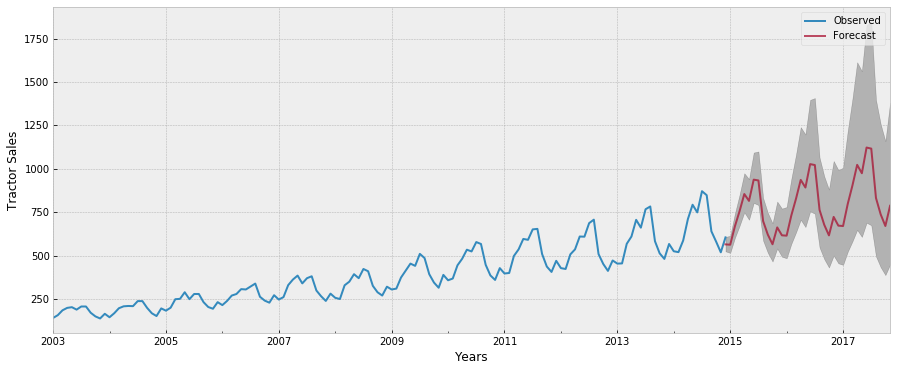

In [64]:
# Plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='left_upper')
plt.show()

#### Diagnostics

    #1. Errors follows normality
    #2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
    #3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

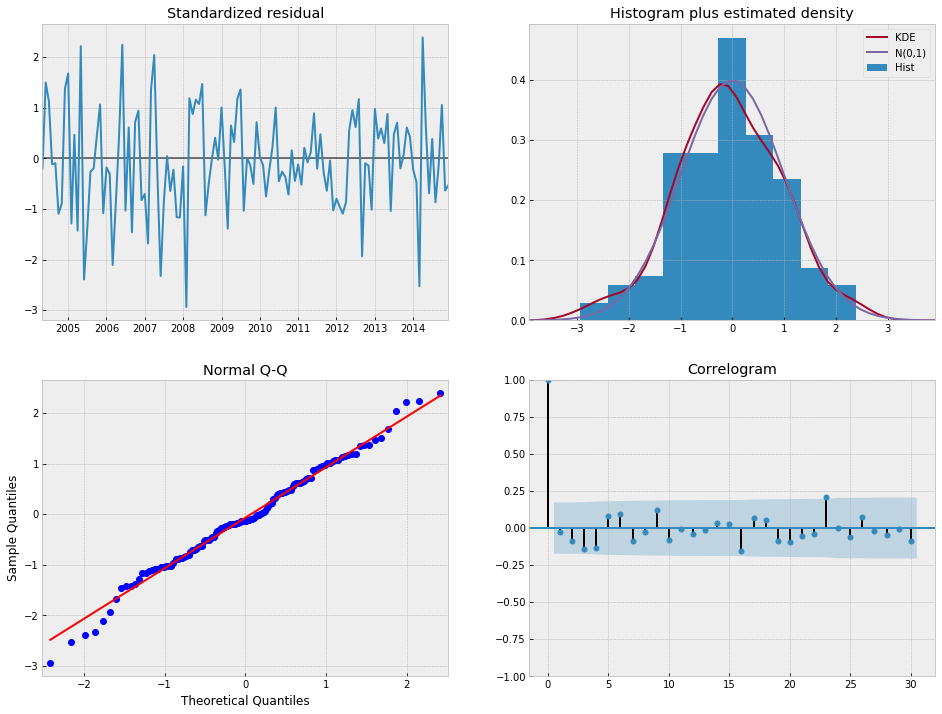

In [129]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not, then it signifies that the model can be further improved and we repeat the process with the residuals. In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

  - The KDE plot of the residuals on the top right is almost similar with the normal distribution.
  - The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
  - The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
Those observations coupled with the fact that there are no spikes outside the insignificant zone of plot lead us to conclude that that residuals are random with no information in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.